# Practice 0 : Monte Carlo integration

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import time
from scipy import integrate

### Loops Implementation

In [2]:
def integrate_mc_loops(fun, a, b, points=10):
    """Calculates the integral of the function passed by argument using x
    points through the Monte Carlo method"""
    
    tic = time.process_time()
    
    # Inicializate vars
    M = 0
    dots_under = 0
    
    # Generate points in the functon and get M
    for i in range(points):
        M = max(M,fun(random.uniform(a, b)))
            
    # Generate random points between [a,b] and [0.M]
    random_dots = []
    for i in range(points):
        random_dots.append((random.uniform(a, b),random.uniform(0, M)))
                           
    #Get points under the graphic                  
    for val in random_dots:
        if val[1] < fun(val[0]) :
            dots_under = dots_under+1
    
    #Get area under the graphic
    area = (dots_under/points) * (b-a) * M
    
    toc = time.process_time()
    
    return (area, (toc-tic)*1000)

In [3]:
print("Area of f(x) = x in [0,4] is: \n")
print("Monte Carlo Method {} ".format(integrate_mc_loops(lambda x: x,0.0,4.0,100000)[0]))
print("Scipy method: {} ".format(integrate.quad(lambda x: x, 0, 4)[0]))

Area of f(x) = x in [0,4] is: 

Monte Carlo Method 8.00891761068056 
Scipy method: 8.0 


In [7]:
print("Area of f(x) = x² in [0,4] with 100000 points is: \n")
print("Monte Carlo Method {} ".format(integrate_mc_loops(lambda x: x**2,0.0,4.0,100000)[0]))
print("Scipy method: {} ".format(integrate.quad(lambda x: x**2, 0, 4)[0]))

Area of f(x) = x² in [0,4] with 100000 points is: 

Monte Carlo Method 21.32955955967978 
Scipy method: 21.333333333333336 


### Numpy Implementation

In [8]:
def integrate_mc_numpy(fun, a, b, points=10):
    """Calculates the integral of the function passed by argument using x
    points through the Monte Carlo method"""
    
    tic = time.process_time()
    
    # Inicializate vars
    M = 0
    dots_under = 0
    
    # Generate points in the functon and get M
    M = np.max(fun(np.random.uniform(a,b,points)))
            
    # Generate random points between [a,b] and [0.M]
    random_dots_x = np.random.uniform(a, b, points)
    random_dots_y = np.random.uniform(0, M, points)
                           
    #Get points under the graphic  
    dots_under = random_dots_y[random_dots_y < fun(random_dots_x)]
               
    #Get area under the graphic
    area = (len(dots_under)/points) * (b-a) * M
    
    toc = time.process_time()
    
    return (area, (toc-tic)*1000)

In [9]:
print("Area of f(x) = x in [0,4] is: \n")
print("Monte Carlo Method {} ".format(integrate_mc_numpy(lambda x: x,0.0,4.0,100000)[0]))
print("Scipy method: {} ".format(integrate.quad(lambda x: x, 0, 4)[0]))

Area of f(x) = x in [0,4] is: 

Monte Carlo Method 7.990830806098692 
Scipy method: 8.0 


In [10]:
print("Area of f(x) = x² in [0,4] with 100000 points is: \n")
print("Monte Carlo Method {} ".format(integrate_mc_numpy(lambda x: x**2,0.0,4.0,100000)[0]))
print("Scipy method: {} ".format(integrate.quad(lambda x: x**2, 0, 4)[0]))

Area of f(x) = x² in [0,4] with 100000 points is: 

Monte Carlo Method 21.33677090572575 
Scipy method: 21.333333333333336 


In [11]:
def compare_times():
    sizes = np.linspace(100,1000000,20)
    times_loop = []
    times_numpy = []
    for size in sizes:
        times_loop.append(integrate_mc_loops(lambda x: x**2,0,4,int(size))[1])
        times_numpy.append(integrate_mc_numpy(lambda x: x**2,0,4,int(size))[1])
    
    plt.figure()
    plt.scatter(sizes,times_loop,c="red", label="Loop")
    plt.scatter(sizes,times_numpy, c="blue", label ="Numpy")
    plt.legend()

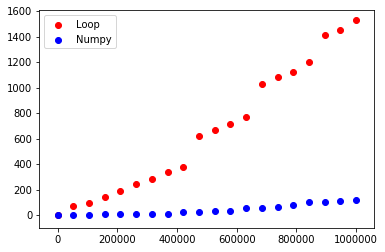

In [12]:
compare_times()